Instructions: answer the following questions with data and visuals (where appropriate)
==

- Give an overall summary of your performance from HW2 on the dataset
- Do you see any areas for improvement?
- Run k-Means on the dataset and describe your results
- Run PCA on the dataset and describe your results
- Use the cluster outputs you got from running k-means as a new feature. Rerun your "worst" and "best" model from HW2, including this new feature along with your old features. Describe your results.
- Use the PCA outputs you got from running PCA above as your features. Rerun your "worst" and "best" model from HW2, - with the PCA features instead of your old features. Describe your results.
- Give your conclusions on the use of k-Means and PCA on the Diabetes dataset


Analysis:
==

This section contains the anlysis of my homework.

## 1) Give an overall summary of your performance from HW2 on the dataset
ehhh not my best work. Although I understand the concepts of each algorithm, when it came to implementing the code I felt lost. 

## 2) Do you see any areas for improvement?

Yes, I want to revistit most of the work from hw2. Particularly focusing on Naive Bayes and Random Forest.


## 3) Run k-Means on the dataset and describe your results
I explored multiple different k options, but landed on using k==2. Since we're only attempting to find 2 populations - does have diabetes and does not have diabetes- I concluded that k==2 was the best way to search for those groups.

Once decided to use k==2 I generated an accuracy score, silhouette score, and inertia score. 

- Accuracy of K-means == 36.94%
- Silhouette score is 25.46% when K == 2
- Inertia score is 1671.77413745 when k = 2

## 4) Run PCA on the dataset and describe your results
I wanted PCA to return components that would explain at least 90% of the data sets's variance. The data set I used for PCA had 7 features. The results of the analysis determined that 5 components explain 90% of the variance. 

## 5) Use the cluster outputs you got from running k-means as a new feature. Rerun your "worst" and "best" model from HW2, including this new feature along with your old features. Describe your results.

For homework 2 the best perfomring algorithm was kNN, and the worst performing was MultinomialNB. MultinomialNB may have been the worse performing because it was the one I felt like I struggled with the most. Additionally, in this project I used GaussianNB instead of MultinomialNB. Before I fed the data set to K-mean I scaled the features. I then tried to used the scaled features, along with the results from k-mean, with MultinomialNB. Because scaling turned some data points into negative numbers MultinomialNB was unable to perform the analysis. Since GaussianNB does not have trouble with negative numbers I decided to use GaussianNB rather than MultinomialNB.

When performing the analyses I established baseline accuracy for kNN and GaussianNB.
- kNN accuracy: 80.77% when k==47
- GaussianNB accuracy: 78.06% on the training data, and 75.64% on the test data.

After creating the baseline accuracy scores, I used the predictors from k-means clusters as a new feature and retested the accuracy of kNN and GaussianNB.
- kNN accuracy with k-means: 80.77% when k==42
- GaussianNB accuracy with k-means: 74.84% on the training data, and 74.36% on the test data.

**k-means as a new feature:**
using k-means as a new feature did not seem to have an impact on kNN and slightly lowered accuracy for GaussianNB. 





## 6) Use the PCA outputs you got from running PCA above as your features. Rerun your "worst" and "best" model from HW2, - with the PCA features instead of your old features. Describe your results.

After creating the baseline accuracy scores, I used used the outputs from PCA and retested the accuracy of kNN and GaussianNB.
- kNN accuracy with PCA outputs: 75.64%% when k==32
- GaussianNB accuracy with PCA outputs: 77.10% on the training data, and 71.79% on the test data.

**Using PCA inputs:**
Using the PCA outputs lowered the accuracy for kNN as well as GaussianNB.


## 7) Give your conclusions on the use of k-Means and PCA on the Diabetes dataset

I was not very impressed by the results of k-means or PCA. Initially I believed that PCA would yeild higher accuracy results. I was also very hopeful to see better performance by using k-mean predictions as new variables. In addition to using k-mean and PCA, I attemped to use new variables and even removed outliers from the data set. Each of these explorations returned poorer results. I therefore did not include them in the final homework analysis.

Even though I did not see the results I wanted, using k-mean or PCA in a modeling pipeline seems like a very smart idea. I will definately test with it in the future.

Vizuals
==

This section contains all vizual aspects of my homework.

## 3) Run k-Means on the dataset and describe your results
I explored multiple different k options, but landed on using k==2. Since we're only attempting to find 2 populations, does have diabetes and does not have diabetes, I concluded that k==2 was the best way to search for those groups.

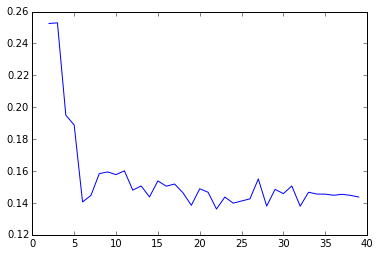

In [586]:
# Visualize the clusters and describe anything you see
x = []
y_plot = []
for n in range(2,40):
    km2 = KMeans(n_clusters=n, n_init=20)
    centers = km2.fit_predict(X_scale)
    x.append(n)
    y_plot.append(silhouette_score(X_scale, centers))
plt.plot(x, y_plot);

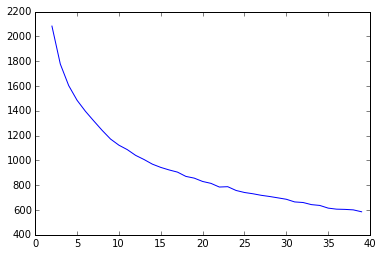

In [587]:
# lower numbers are better but no sense of a "good" number

# Visualize the clusters and describe anything you see

x = []
y_plot = []
for n in range(2,40):
    km2 = KMeans(n_clusters=n, n_init=20)
    km2.fit(X_scale)
    x.append(n)
    y_plot.append(km2.inertia_)
plt.plot(x, y_plot);

## 4) Run PCA on the dataset and describe your results
I wanted PCA to return components that would explain at least 90% of the data sets's variance. The data set I used for PCA had 7 features. The results of the analysis determined that 5 components explain 90% of the variance. 

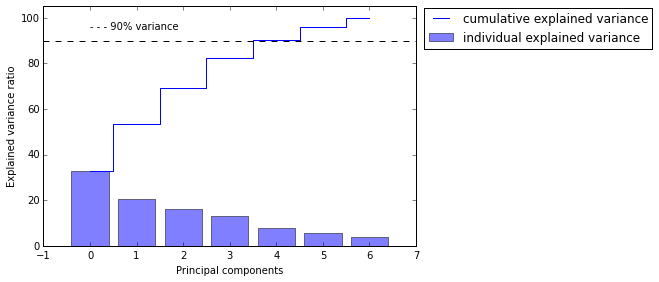

In [588]:
# plot variance
# add dotted line at 90%
plt.figure(figsize=(6, 4))

plt.bar(range(n_components_input), var_exp, alpha=0.5, align='center', 
        label='individual explained variance')
plt.step(range(n_components_input), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.ylim(0, 105)
plt.legend(bbox_to_anchor=(1.65, 1.02))
plt.axhline(y=90, ls='dashed', lw=1, color='black')
plt.annotate('- - - 90% variance', xy=(0, 95), xytext=(0, 95))
plt.tight_layout()

## 5) Use the cluster outputs you got from running k-means as a new feature. Rerun your "worst" and "best" model from HW2, including this new feature along with your old features. Describe your results.

When performing the analyses I established baseline accuracy for kNN and GaussianNB.
kNN accuracy: 80.77% when k==47
GaussianNB accuracy: 78.06% on the training data, and 75.64% on the test data.

## kNN baseline

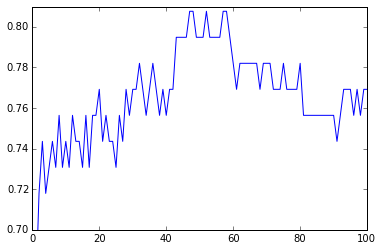

In [594]:
# use matplotlib to make a visualization showing how the score
# changes when we change n_neighbors
scores = []
n_neighbors = range(1, 101)
for n in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n, weights='uniform', p=2)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    
plt.plot(n_neighbors, scores)
plt.ylim(.7, .81);

In [600]:
kNN_results = pd.DataFrame(n_neighbors)
kNN_results['accuracy'] = scores
kNN_results.columns = ['k', 'accuracy']
accuracy_max_k = kNN_results[kNN_results['accuracy'] == kNN_results['accuracy'].max()]['k'].reset_index(drop=True)[0]
print 'Max accuracy score is {}%%'.format(float(round(kNN_results['accuracy'].max(), 4)*100))
print 'K == {} when the accuracy score is the greatest'.format(accuracy_max_k)

Max accuracy score is 80.77%%
K == 42 when the accuracy score is the greatest


## GaussianNB baseline

In [604]:
from sklearn import metrics

pred_train = gnb.predict(X_train)

print('\nPrediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_train)))

pred_test = gnb.predict(X_test)

print('\nPrediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))


Prediction accuracy for the training dataset
78.06%

Prediction accuracy for the test dataset
75.64%



## Use kNN to predict diabetes using predictions form K-means as a new feature

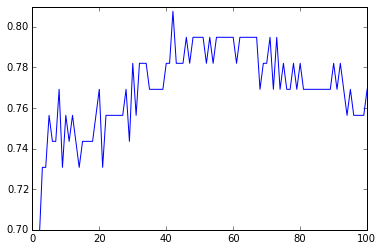

In [599]:
from sklearn.neighbors import KNeighborsClassifier
# use matplotlib to make a visualization showing how the score
# changes when we change n_neighbors
# YOUR CODE HERE
scores = []
n_neighbors = range(1, 101)
for n in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n, weights='uniform', p=2)
    knn.fit(X_train, pd.Categorical(y_train['Class variable']))
    scores.append(knn.score(X_test, pd.Categorical(y_test['Class variable'])))
    
plt.plot(n_neighbors, scores)
plt.ylim(.7, .81);

## Use GaussianNb to predict diabetes using predictions form K-means as a new feature

In [610]:
from sklearn import metrics

pred_train = gnb.predict(X_train)

print('\nPrediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_train)))

pred_test = gnb.predict(X_test)

print('\nPrediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))


Prediction accuracy for the training dataset
74.84%

Prediction accuracy for the test dataset
74.36%



## 6) Use the PCA outputs you got from running PCA above as your features. Rerun your "worst" and "best" model from HW2, - with the PCA features instead of your old features. Describe your results.

## Use kNN from PCA

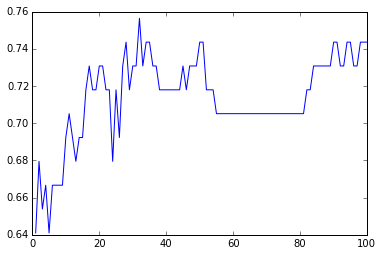

In [614]:
from sklearn.neighbors import KNeighborsClassifier
# use matplotlib to make a visualization showing how the score
# changes when we change n_neighbors
# YOUR CODE HERE
scores = []
n_neighbors = range(1, 101)
for n in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n, weights='uniform', p=2)
    knn.fit(pca.fit_transform(X_train), y_train)
    scores.append(knn.score(pca.fit_transform(X_test), y_test))
    
plt.plot(n_neighbors, scores)
plt.ylim(.64, .76);

## Use GaussianNb from PCA

In [618]:
from sklearn import metrics

pred_train = gnb.predict(X_train)

print('\nPrediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_train)))

pred_test = gnb.predict(X_test)

print('\nPrediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))


Prediction accuracy for the training dataset
77.10%

Prediction accuracy for the test dataset
71.79%



Code
==

This section contains the code of my homework (excluding exploratory work).

In [1]:
import requests
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split, ShuffleSplit
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.svm import SVC
from sklearn.preprocessing import scale
from __future__ import division
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:

# Use request to get data
r = requests.get('http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data')
raw_data = r.text

# Save the data as a dataframe with head to understand headers
column_names = ['Pregnant',
                'Glucose tolerance test',
                'Diastolic blood pressure',
                'Triceps thickness',
                '2-Hour serum insulin',
                'Body mass index',
                'Diabetes pedigree',
                'Age',
                'Class variable']
# split data by '\n' because it comes in as a large txt file and needs to be converted to a dataframe
data = raw_data.split('\n')

pima_indian_data = pd.DataFrame(np.loadtxt(data, delimiter=","), columns=column_names)

# view the data
pima_indian_data.head()

,Pregnant,Glucose tolerance test,Diastolic blood pressure,Triceps thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree,Age,Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# drop missing data and make a new dataframe
# Because diabetes research is very interested in Tricep Thickness
# We would ideally we would like to imputtin this missing data.
# However, for now we will drop it.
# '2-Hour serum insulin' contains a lot of missing values and will be dropped
# The highest mortality risk was at those extremes of blood pressure:
# about six-fold for less than 80/40 mm Hg and two-fold for more than 210/120 mm Hg
# http://www.medpagetoday.com/Nephrology/GeneralNephrology/41075
# less than 40 seems unlikely for distolic blood pressure. We'll remove < 40


print 'missing Tricep thickness:{}'.format(pima_indian_data[pima_indian_data['Triceps thickness'] == 0].shape[0])
print 'missing serum insulin thickness:{}'.format(pima_indian_data[pima_indian_data['2-Hour serum insulin'] == 0].shape[0])

pima_predict_df = pima_indian_data[(pima_indian_data['Glucose tolerance test'] > 0)& 
                     (pima_indian_data['Diastolic blood pressure'] > 39)& 
                    (pima_indian_data['Body mass index'] > 0)& 
                    (pima_indian_data['2-Hour serum insulin'] > 0)].drop(['Triceps thickness']
                                                                    ,1).reset_index(drop=True)
pima_predict_df.describe()

missing Tricep thickness:227
missing serum insulin thickness:374


,Pregnant,Glucose tolerance test,Diastolic blood pressure,2-Hour serum insulin,Body mass index,Diabetes pedigree,Age,Class variable
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,3.324742,122.889175,71.077320,156.822165,33.042784,0.524198,30.909794,0.332474
std,3.219403,30.897690,11.860263,119.158687,6.932262,0.346779,10.234441,0.471708
min,0.000000,56.000000,40.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,120.000000,70.000000,126.000000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.250000,78.000000,190.250000,37.025000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Run k-Means on the dataset and describe your results
==

In [581]:
# assign X and y for our model
# Try the dataset with only the varibles given
X, y = pima_predict_df.drop(['Class variable'], 1), pima_predict_df['Class variable']

In [582]:
X.head(2)

,Pregnant,Glucose tolerance test,Diastolic blood pressure,2-Hour serum insulin,Body mass index,Diabetes pedigree,Age
0,1,89,66,94,28.1,0.167,21
1,0,137,40,168,43.1,2.288,33


In [583]:
y.head(2)

0    0
1    1
Name: Class variable, dtype: float64

In [584]:
# Create a dataframe to scale the metrics
# because the features are different types,
# they are measured in different ways.
# Scaling will help level the playing feild
X_scale = scale(X)

In [585]:
# Setup the experiment with test/train and cv
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, 
                                                    test_size=0.2, random_state=2)

cv = ShuffleSplit(X_train.shape[0], n_iter=5, test_size=0.2, random_state=6)

"**Silhouette analysis** can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

"Silhoette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster."

-http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html



**inertia: sum of distances of samples to their closest cluster center (this helps us gauge how good our clusters are by penalizing points that are far away) - smaller is better**

**Because the diabetes results are binary (either you have it or you dont) then we must use k=2. i.e. we are only looking for 2 populations**

In [568]:
km = KMeans(n_clusters=2, n_init=20)
km.fit(X_train)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=20,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [569]:
test = km.predict(X_train)
test_results = pd.concat([pd.DataFrame(test), pd.DataFrame(y_train)],1)
test_results.columns = ['prediction', 'Class variable']
k_accuracy = (test_results[test_results['prediction'] == test_results['Class variable']].shape[0]/test_results.shape[0])*100
centers = km.fit_predict(X_scale)
print 'Accuracy of K-means == {}%%'.format(round(k_accuracy,2))
print 'Silhouette score is {}%% when K == 2'.format(float(round(silhouette_score(X_train,km.fit_predict(X_train))*100, 2)))
print 'Inertia score is {} when k = 2'.format(float(km.inertia_))

Accuracy of K-means == 36.94%%
Silhouette score is 25.46%% when K == 2
Inertia score is 1671.77413745 when k = 2


Run PCA on the dataset and describe your results
==
I will run PCA twice, just as I did K-means above.

In [233]:
# reload the data
pima_predict_df = pima_indian_data[(pima_indian_data['Glucose tolerance test'] > 0)& 
                     (pima_indian_data['Diastolic blood pressure'] > 39)& 
                    (pima_indian_data['Body mass index'] > 0)& 
                    (pima_indian_data['2-Hour serum insulin'] > 0)].drop(['Triceps thickness']
                                                                    ,1).reset_index(drop=True)
# view the data
pima_predict_df.head()

,Pregnant,Glucose tolerance test,Diastolic blood pressure,2-Hour serum insulin,Body mass index,Diabetes pedigree,Age,Class variable
0,1,89,66,94,28.1,0.167,21,0
1,0,137,40,168,43.1,2.288,33,1
2,3,78,50,88,31.0,0.248,26,1
3,2,197,70,543,30.5,0.158,53,1
4,1,189,60,846,30.1,0.398,59,1


In [237]:
X, y = pima_predict_df.drop(['Class variable'], 1), pima_predict_df['Class variable']
X_scale = scale(X)

In [238]:
X.head(2)

,Pregnant,Glucose tolerance test,Diastolic blood pressure,2-Hour serum insulin,Body mass index,Diabetes pedigree,Age
0,1,89,66,94,28.1,0.167,21
1,0,137,40,168,43.1,2.288,33


In [239]:
# Setup the experiment with test/train and cv
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, 
                                                    test_size=0.2, random_state=2)

cv = ShuffleSplit(X_train.shape[0], n_iter=5, test_size=0.2, random_state=6)

In [240]:
X_train

array([[-0.41201826, -1.06582854,  0.7532886 , ..., -1.24835775,
        -0.79460958, -0.67602281],
       [-1.0340536 ,  0.19803146,  3.28600937, ...,  4.91920112,
        -0.59249118, -0.4803519 ],
       [-0.41201826, -0.35288187,  0.58444055, ...,  0.91823201,
        -1.0082776 , -0.67602281],
       ..., 
       [-0.41201826, -0.77416854, -1.61058412, ..., -1.21946989,
         0.32570383, -0.96952917],
       [ 0.21001709, -0.64454187, -0.93519191, ..., -1.30613348,
         1.2756603 ,  0.20449627],
       [-0.72303593,  0.23043813, -0.09095166, ..., -1.03169878,
        -0.15071811, -0.87169371]])

In [241]:
# create PCA will all features
# use all features to vizualize when PCA explains 90% variance
# use the names of the columns in X because X_train is an array
# and therefore has no column names
n_components_input = X.columns.shape[0]
pca = PCA(n_components=n_components_input, whiten=True)
pca.fit(X_train)

PCA(copy=True, n_components=7, whiten=True)

In [242]:
tot = sum(pca.explained_variance_ratio_)
var_exp = [(i / tot)*100 for i in sorted(pca.explained_variance_ratio_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print var_exp
print cum_var_exp

[32.846461777877337, 20.477812920966251, 15.967364730154801, 13.027377176092623, 7.9660834081550265, 5.6618341849186482, 4.0530658018353147]
[  32.84646178   53.3242747    69.29163943   82.31901661   90.28510001
   95.9469342   100.        ]


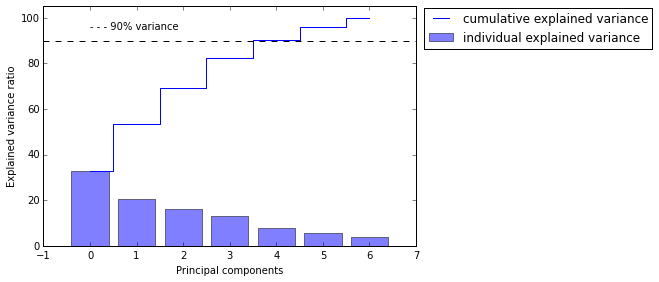

In [243]:
# plot variance
# add dotted line at 90%
plt.figure(figsize=(6, 4))

plt.bar(range(n_components_input), var_exp, alpha=0.5, align='center', 
        label='individual explained variance')
plt.step(range(n_components_input), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.ylim(0, 105)
plt.legend(bbox_to_anchor=(1.65, 1.02))
plt.axhline(y=90, ls='dashed', lw=1, color='black')
plt.annotate('- - - 90% variance', xy=(0, 95), xytext=(0, 95))
plt.tight_layout()

**90% variance is explained with 5 features**

In [244]:
# create PCA to explain 90% of variance
pca = PCA(n_components=.9, whiten=True)
pca.fit(X_train)

PCA(copy=True, n_components=0.9, whiten=True)

In [245]:
pd.DataFrame(pca.components_)

,0,1,2,3,4,5,6
0,0.454211,0.448040,0.333258,0.343708,0.226971,0.110002,0.547851
1,-0.534383,0.323733,0.012158,0.449302,0.493919,0.194570,-0.354679
2,0.054099,0.303578,-0.694460,0.373089,-0.493466,0.190136,0.061514
3,-0.057510,0.160457,0.105251,0.320572,-0.173663,-0.904372,-0.095152
4,0.298705,-0.214270,-0.603152,-0.009381,0.651218,-0.264384,0.083656


In [246]:
# fit and transform PCA
# use this in other models
pd.DataFrame(pca.fit_transform(X_train)).head(2)

,0,1,2,3,4
0,-0.976515,-0.844832,-0.717277,0.692721,-1.360900
1,0.911356,2.542940,-4.643338,0.103008,1.292719


Use the cluster outputs you got from running k-means as a new feature. Rerun your "worst" and "best" model from HW2, including this new feature along with your old features. Describe your results.
==

**Train k-mean with best performance. Then run k-means to predict diabetes. Append results to dataset. Use dataset on 'worst' and 'best' models form HW2.**

- The best perfomring algorithm form HW2 was kNN, and the worst was MultinomialNB.
- GaussianNB will be used instead of MultinomialNB, because MultinomialNB has a problem with negative numbers.

Use kNN to get baseline accuracy
==

In [589]:
X, y = pima_predict_df.drop(['Class variable'], 1), pima_predict_df['Class variable']
X_scale = scale(X)
# Setup the experiment with test/train and cv
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, 
                                                    test_size=0.2, random_state=2)

cv = ShuffleSplit(X_train.shape[0], n_iter=5, test_size=0.2, random_state=6)

In [590]:
pd.DataFrame(X_train).dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
dtype: object

In [591]:
knn = KNeighborsClassifier(n_neighbors=1, weights='uniform', p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=1, p=2, weights='uniform')

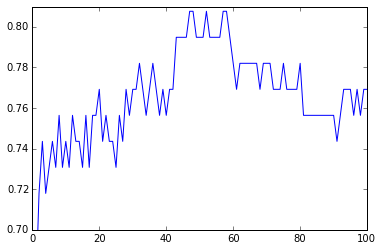

In [592]:
# use matplotlib to make a visualization showing how the score
# changes when we change n_neighbors
scores = []
n_neighbors = range(1, 101)
for n in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n, weights='uniform', p=2)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    
plt.plot(n_neighbors, scores)
plt.ylim(.7, .81);

In [463]:
kNN_results = pd.DataFrame(n_neighbors)
kNN_results['accuracy'] = scores
kNN_results.columns = ['k', 'accuracy']
accuracy_max_k = kNN_results[kNN_results['accuracy'] == kNN_results['accuracy'].max()]['k'].reset_index(drop=True)[0]
print 'Max accuracy score is {}%%'.format(float(round(kNN_results['accuracy'].max(), 4)*100))
print 'K == {} when the accuracy score is the greatest'.format(accuracy_max_k)

Max accuracy score is 80.77%%
K == 47 when the accuracy score is the greatest


**kNN alone, accuracy is 80.77%**

Use kNN to predict diabetes using predictions form K-means as a new feature
==

In [595]:
X, y = pima_predict_df.drop(['Class variable'], 1), pima_predict_df['Class variable']
X_scale = scale(X)

# Setup the experiment with test/train and cv
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, 
                                                    test_size=0.2, random_state=2)


cv = ShuffleSplit(X_train.shape[0], n_iter=5, test_size=0.2, random_state=6)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

km = KMeans(n_clusters=2, n_init=20)
km.fit(X_train)

X_train['cluster outputs'] = pd.Categorical(km.predict(X_train))
X_test['cluster outputs'] = pd.Categorical(km.predict(X_test))

In [596]:
X_train.head(2)

,0,1,2,3,4,5,6,cluster outputs
0,-0.412018,-1.065829,0.753289,-0.855612,-1.248358,-0.794610,-0.676023,0
1,-1.034054,0.198031,3.286009,-0.225387,4.919201,-0.592491,-0.480352,1


In [597]:
X_test.head(2)

,0,1,2,3,4,5,6,cluster outputs
0,-0.101001,0.198031,-0.597496,-0.351432,-0.959479,-0.881232,-0.284681,0
1,0.832052,0.910978,-0.766344,-0.309417,0.354919,0.484511,-0.284681,1


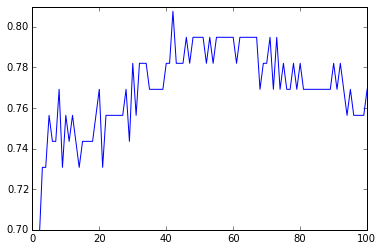

In [598]:
from sklearn.neighbors import KNeighborsClassifier
# use matplotlib to make a visualization showing how the score
# changes when we change n_neighbors
# YOUR CODE HERE
scores = []
n_neighbors = range(1, 101)
for n in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n, weights='uniform', p=2)
    knn.fit(X_train, pd.Categorical(y_train['Class variable']))
    scores.append(knn.score(X_test, pd.Categorical(y_test['Class variable'])))
    
plt.plot(n_neighbors, scores)
plt.ylim(.7, .81);

In [478]:
kNN_results = pd.DataFrame(n_neighbors)
kNN_results['accuracy'] = scores
kNN_results.columns = ['k', 'accuracy']
accuracy_max_k = kNN_results[kNN_results['accuracy'] == kNN_results['accuracy'].max()]['k'].reset_index(drop=True)[0]
print 'Max accuracy score is {}%%'.format(float(round(kNN_results['accuracy'].max(), 4)*100))
print 'K == {} when the accuracy score is the greatest'.format(accuracy_max_k)

Max accuracy score is 80.77%%
K == 42 when the accuracy score is the greatest


In [479]:
knn = KNeighborsClassifier(n_neighbors=accuracy_max_k, weights='uniform', p=2)
knn.fit(X_train, pd.Categorical(y_train['Class variable']))
print knn.score(X_test, pd.Categorical(y_test['Class variable']))

0.807692307692


**Using kNN with predictions from K-means is much larger than using k-means alone, but the same as kNN**

Use GaussianNb to get baseline accuracy
==

In [601]:
X, y = pima_predict_df.drop(['Class variable'], 1), pima_predict_df['Class variable']
X_scale = scale(X)
# Setup the experiment with test/train and cv
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, 
                                                    test_size=0.2, random_state=2)

cv = ShuffleSplit(X_train.shape[0], n_iter=5, test_size=0.2, random_state=6)

In [602]:
from sklearn.naive_bayes import GaussianNB
# run GaussianNB because MultinomialNB was unable to work with negative numbers
gnb = GaussianNB()
fit = gnb.fit(X_train, y_train)

In [603]:
from sklearn import metrics

pred_train = gnb.predict(X_train)

print('\nPrediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_train)))

pred_test = gnb.predict(X_test)

print('\nPrediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))


Prediction accuracy for the training dataset
78.06%

Prediction accuracy for the test dataset
75.64%



Use GaussianNb to predict diabetes using predictions form K-means as a new feature
==

In [605]:
X, y = pima_predict_df.drop(['Class variable'], 1), pima_predict_df['Class variable']
X_scale = scale(X)

# Setup the experiment with test/train and cv
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, 
                                                    test_size=0.2, random_state=2)


cv = ShuffleSplit(X_train.shape[0], n_iter=5, test_size=0.2, random_state=6)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

km = KMeans(n_clusters=2, n_init=20)
km.fit(X_train)

X_train['cluster outputs'] = pd.Categorical(km.predict(X_train))
X_test['cluster outputs'] = pd.Categorical(km.predict(X_test))

In [606]:
X_train.head(2)

,0,1,2,3,4,5,6,cluster outputs
0,-0.412018,-1.065829,0.753289,-0.855612,-1.248358,-0.794610,-0.676023,0
1,-1.034054,0.198031,3.286009,-0.225387,4.919201,-0.592491,-0.480352,1


In [607]:
X_test.head(2)

,0,1,2,3,4,5,6,cluster outputs
0,-0.101001,0.198031,-0.597496,-0.351432,-0.959479,-0.881232,-0.284681,0
1,0.832052,0.910978,-0.766344,-0.309417,0.354919,0.484511,-0.284681,1


In [608]:
# run GaussianNB
gnb = GaussianNB()
fit = gnb.fit(X_train, y_train)


//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [609]:
from sklearn import metrics

pred_train = gnb.predict(X_train)

print('\nPrediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_train)))

pred_test = gnb.predict(X_test)

print('\nPrediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))


Prediction accuracy for the training dataset
74.84%

Prediction accuracy for the test dataset
74.36%



**Using bayes with predictions from K-means did worse than GaussianNB, kNN, and kNN with k-means predictors. However, using bayes GaussianNB with k-means predictors did better than k-means alone.**

Use the PCA outputs you got from running PCA above as your features. Rerun your "worst" and "best" model from HW2, - with the PCA features instead of your old features. Describe your results.
==

**Use kNN**
==

In [611]:
# Setup the experiment with test/train and cv
X, y = pima_predict_df.drop(['Class variable'], 1), pima_predict_df['Class variable']
X_scale = scale(X)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, 
                                                    test_size=0.2, random_state=2)

cv = ShuffleSplit(X_train.shape[0], n_iter=5, test_size=0.2, random_state=6)

In [612]:
# create PCA to explain 90% of variance
pca = PCA(n_components=.9, whiten=True)
pca.fit(X_train)

PCA(copy=True, n_components=0.9, whiten=True)

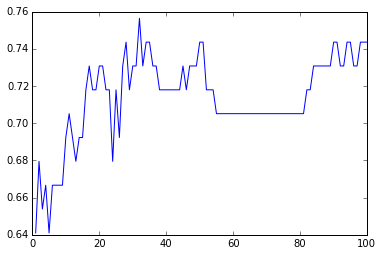

In [613]:
from sklearn.neighbors import KNeighborsClassifier
# use matplotlib to make a visualization showing how the score
# changes when we change n_neighbors
# YOUR CODE HERE
scores = []
n_neighbors = range(1, 101)
for n in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n, weights='uniform', p=2)
    knn.fit(pca.fit_transform(X_train), y_train)
    scores.append(knn.score(pca.fit_transform(X_test), y_test))
    
plt.plot(n_neighbors, scores)
plt.ylim(.64, .76);

In [495]:
kNN_results = pd.DataFrame(n_neighbors)
kNN_results['accuracy'] = scores
kNN_results.columns = ['k', 'accuracy']
accuracy_max_k = kNN_results[kNN_results['accuracy'] == kNN_results['accuracy'].max()]['k'].reset_index(drop=True)[0]
print 'Max accuracy score is {}%%'.format(float(round(kNN_results['accuracy'].max(), 4)*100))
print 'K == {} when the accuracy score is the greatest'.format(accuracy_max_k)

Max accuracy score is 75.64%%
K == 32 when the accuracy score is the greatest


In [496]:
knn = KNeighborsClassifier(n_neighbors=accuracy_max_k, weights='uniform', p=2)
knn.fit(pca.fit_transform(X_train), y_train)
print knn.score(pca.fit_transform(X_test), y_test)

0.75641025641


**Using kNN with PCA performed worse than kNN with k-means**

**Use GaussianNb**
==

In [615]:
# Setup the experiment with test/train and cv
X, y = pima_predict_df.drop(['Class variable'], 1), pima_predict_df['Class variable']
X_scale = scale(X)

# Setup the experiment with test/train and cv
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, 
                                                    test_size=0.2, random_state=2)


cv = ShuffleSplit(X_train.shape[0], n_iter=5, test_size=0.2, random_state=6)

pca = PCA(n_components=.9).fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [616]:
# on non-standardized data
gnb = GaussianNB()
fit = gnb.fit(X_train, y_train)

In [617]:
from sklearn import metrics

pred_train = gnb.predict(X_train)

print('\nPrediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_train)))

pred_test = gnb.predict(X_test)

print('\nPrediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))


Prediction accuracy for the training dataset
77.10%

Prediction accuracy for the test dataset
71.79%



**When compared to using k-means predictors as variables, using GaussianNB with PCA lead to higher accuracy results in training data, but lower accuracy results in test data**